In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


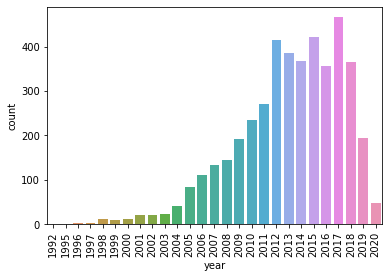

In [5]:
sns.countplot(df,x='year')
plt.xticks(rotation=90)
plt.show()

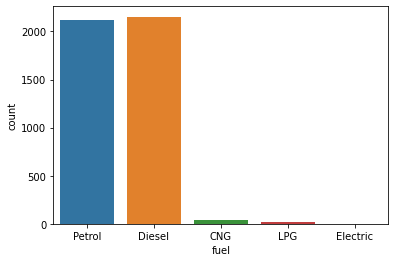

In [6]:
sns.countplot(df,x='fuel')
plt.show()

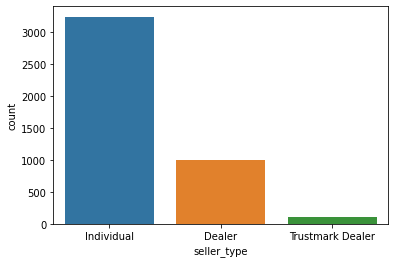

In [7]:
sns.countplot(df,x='seller_type')
plt.show()

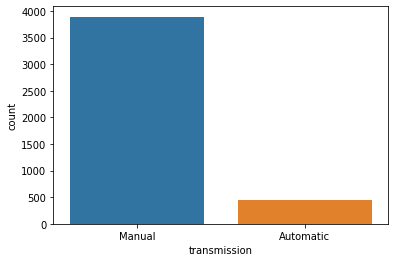

In [8]:
sns.countplot(df,x='transmission')
plt.show()

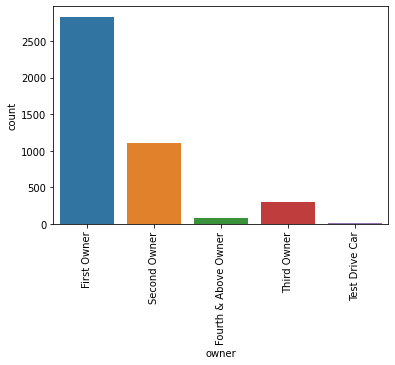

In [9]:
sns.countplot(df,x='owner')
plt.xticks(rotation=90)
plt.show()

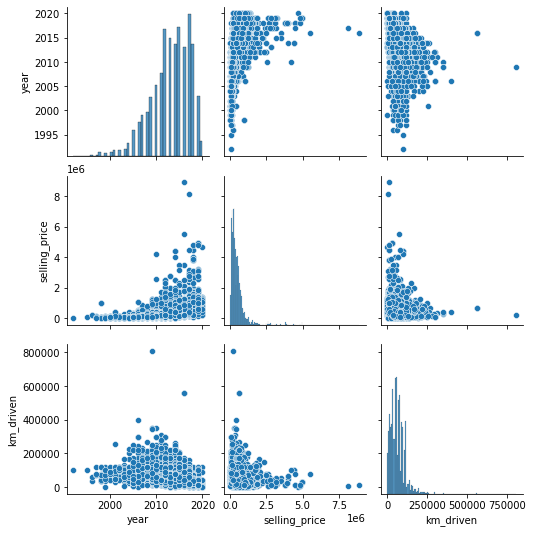

In [10]:
sns.pairplot(df)
plt.show()

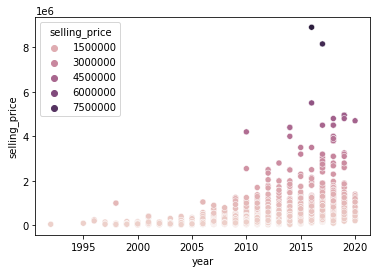

In [11]:
sns.scatterplot(df,x='year',y='selling_price',hue='selling_price')
plt.show()

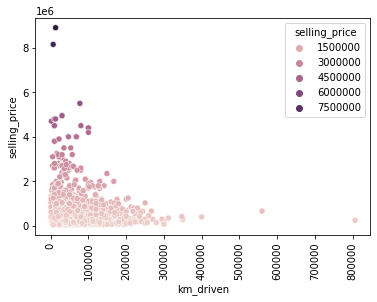

In [12]:
sns.scatterplot(df,x='km_driven',y='selling_price',hue='selling_price')
plt.xticks(rotation=90)
plt.show()

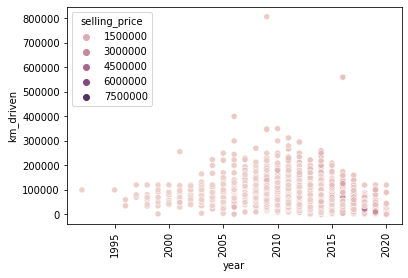

In [13]:
sns.scatterplot(df,x='year',y='km_driven',hue='selling_price')
plt.xticks(rotation=90)
plt.show()

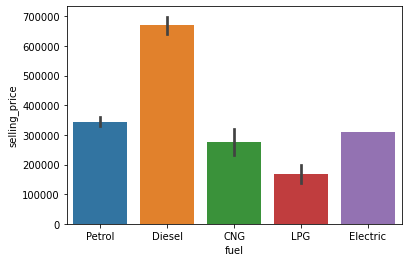

In [14]:
sns.barplot(df,x='fuel',y='selling_price')
plt.show()

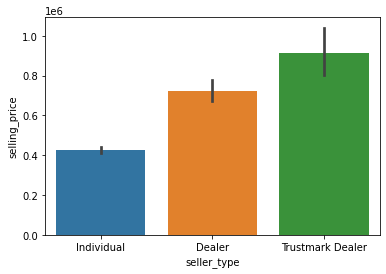

In [15]:
sns.barplot(df,x='seller_type',y='selling_price')
plt.show()

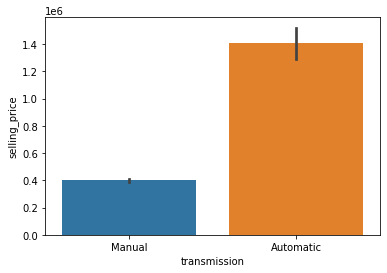

In [16]:
sns.barplot(df,x='transmission',y='selling_price')
plt.show()

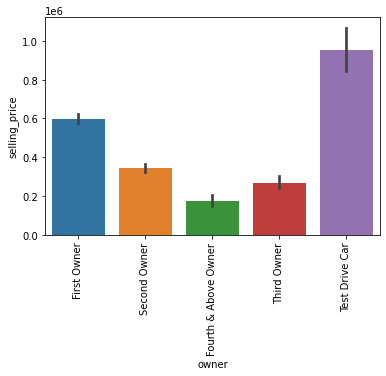

In [17]:
sns.barplot(df,x='owner',y='selling_price')
plt.xticks(rotation=90)
plt.show()

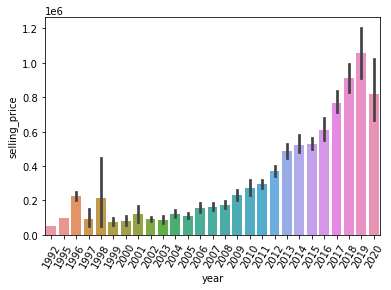

In [18]:
sns.barplot(df,x='year',y='selling_price')
plt.xticks(rotation=60)
plt.show()

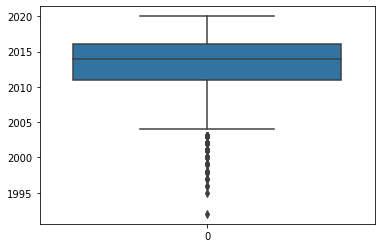

In [19]:
sns.boxplot(df['year'])
plt.show()

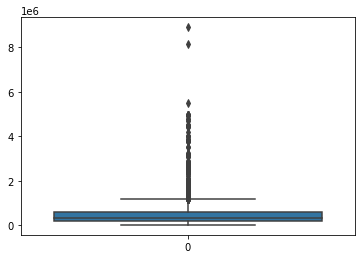

In [20]:
sns.boxplot(df['selling_price'])
plt.show()

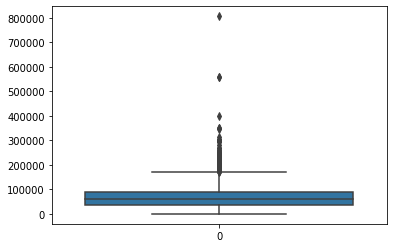

In [21]:
sns.boxplot(df['km_driven'])
plt.show()

C:\Users\power\AppData\Local\Temp\ipykernel_11356\3192104594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


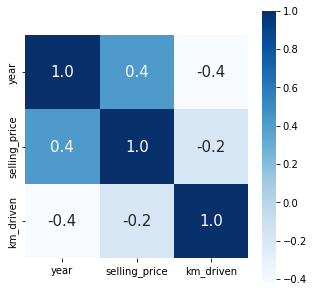

In [22]:
correlation=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='Blues')
plt.show()

In [23]:
df.duplicated().sum()

763

In [24]:
df=df.drop_duplicates()

In [25]:
df['fuel'].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [26]:
df['seller_type'].value_counts()

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [27]:
df['transmission'].value_counts()

Manual       3265
Automatic     312
Name: transmission, dtype: int64

In [28]:
df['owner'].value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

In [29]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [31]:
df=df.drop('name',axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [32]:
df_fuel=pd.get_dummies(df['fuel'])
df_fuel.head()

,CNG,Diesel,Electric,LPG,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0


In [33]:
df=pd.concat([df,df_fuel],axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,CNG,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0,0,0,1
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,0,0,0,1
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,0,1,0,0,0
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,0,0,0,0,1
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0,1,0,0,0


In [34]:
df=df.drop('fuel',axis=1)
df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,CNG,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,Individual,Manual,First Owner,0,0,0,0,1
1,2007,135000,50000,Individual,Manual,First Owner,0,0,0,0,1
2,2012,600000,100000,Individual,Manual,First Owner,0,1,0,0,0
3,2017,250000,46000,Individual,Manual,First Owner,0,0,0,0,1
4,2014,450000,141000,Individual,Manual,Second Owner,0,1,0,0,0


In [35]:
df['seller_type']=df['seller_type'].replace('Individual',0)
df['seller_type']=df['seller_type'].replace('Dealer',1)
df['seller_type']=df['seller_type'].replace('Trustmark Dealer',2)
df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,CNG,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,0,Manual,First Owner,0,0,0,0,1
1,2007,135000,50000,0,Manual,First Owner,0,0,0,0,1
2,2012,600000,100000,0,Manual,First Owner,0,1,0,0,0
3,2017,250000,46000,0,Manual,First Owner,0,0,0,0,1
4,2014,450000,141000,0,Manual,Second Owner,0,1,0,0,0


In [36]:
df['transmission']=df['transmission'].apply(lambda x: 1 if x=='Manual' else 0)
df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,CNG,Diesel,Electric,LPG,Petrol
0,2007,60000,70000,0,1,First Owner,0,0,0,0,1
1,2007,135000,50000,0,1,First Owner,0,0,0,0,1
2,2012,600000,100000,0,1,First Owner,0,1,0,0,0
3,2017,250000,46000,0,1,First Owner,0,0,0,0,1
4,2014,450000,141000,0,1,Second Owner,0,1,0,0,0


In [37]:
one_hot=OneHotEncoder()

In [38]:
transformed=one_hot.fit_transform(df[['owner']])

In [39]:
print(transformed.toarray())

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [40]:
print(one_hot.categories_)

[array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]


In [41]:
df[one_hot.categories_[0]]=transformed.toarray()
print(df.head())

   year  selling_price  km_driven  seller_type  transmission         owner  \
0  2007          60000      70000            0             1   First Owner   
1  2007         135000      50000            0             1   First Owner   
2  2012         600000     100000            0             1   First Owner   
3  2017         250000      46000            0             1   First Owner   
4  2014         450000     141000            0             1  Second Owner   

   CNG  Diesel  Electric  LPG  Petrol  First Owner  Fourth & Above Owner  \
0    0       0         0    0       1          1.0                   0.0   
1    0       0         0    0       1          1.0                   0.0   
2    0       1         0    0       0          1.0                   0.0   
3    0       0         0    0       1          1.0                   0.0   
4    0       1         0    0       0          0.0                   0.0   

   Second Owner  Test Drive Car  Third Owner  
0           0.0            

In [42]:
df=pd.DataFrame(df)
df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,60000,70000,0,1,First Owner,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,0,1,First Owner,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,0,1,First Owner,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2017,250000,46000,0,1,First Owner,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
4,2014,450000,141000,0,1,Second Owner,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0


In [43]:
df=df.drop('owner',axis=1)
df.head()

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,60000,70000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2017,250000,46000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
4,2014,450000,141000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0


In [44]:
df.duplicated().sum()

79

In [45]:
df=df.drop_duplicates()

In [46]:
df.shape

(3498, 15)

In [47]:
df[df['selling_price']>6000000]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
89,2017,8150000,6500,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
3872,2016,8900000,13000,1,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0


In [48]:
df=df[df['selling_price']<6000000]

In [49]:
df.shape

(3496, 15)

In [50]:
df[df['year']<1993]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
3334,1992,50000,100000,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0


In [51]:
df=df[df['year']>1993]

In [52]:
df[df['km_driven']>380000]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
525,2016,665000,560000,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
1243,2009,250000,806599,1,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
3679,2006,400000,400000,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0


In [53]:
df['km_driven'].mean()

69544.97911301859

In [54]:
df=df[df['km_driven']<380000]

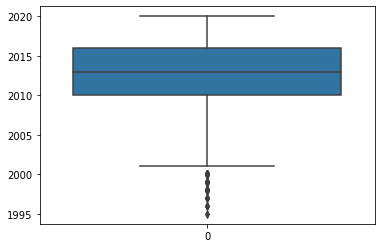

In [55]:
sns.boxplot(df['year'])
plt.show()

In [56]:
df['year'].mean()

2012.9447308132876

In [57]:
df[df['year']<2001]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
61,1996,250000,35000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
137,1998,40000,40000,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0
372,2000,60000,40000,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0
391,1999,50000,120000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
631,1995,95000,100000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
850,1999,85000,70000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1126,1999,60000,35000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1184,2000,165000,60000,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0
1397,2000,155000,50000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
1404,2000,50000,60000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0


In [58]:
df=df[df['year']>2001]

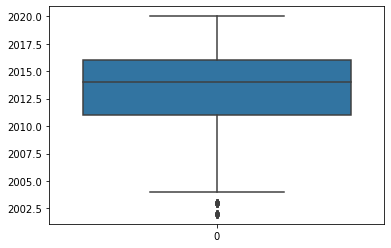

In [59]:
sns.boxplot(df['year'])
plt.show()

In [60]:
df=df[df['year']>2003.5]

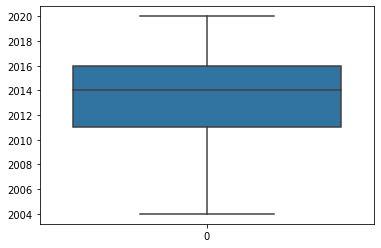

In [61]:
sns.boxplot(df['year'])
plt.show()

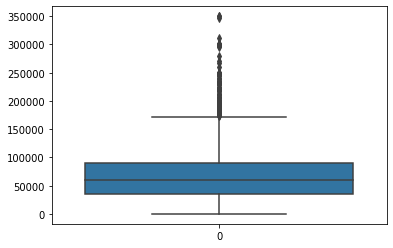

In [62]:
sns.boxplot(df['km_driven'])
plt.show()

In [63]:
df[df['km_driven']>170000]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
32,2011,1190000,175900,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
69,2010,280000,350000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
70,2011,350000,230000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
159,2015,300000,175000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
197,2009,229999,230000,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,2009,120000,250000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
4231,2011,800000,230000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
4255,2014,650000,218000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
4286,2010,130000,210000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0


In [64]:
df=df[df['km_driven']<170000]

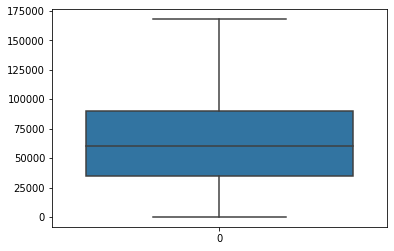

In [65]:
sns.boxplot(df['km_driven'])
plt.show()

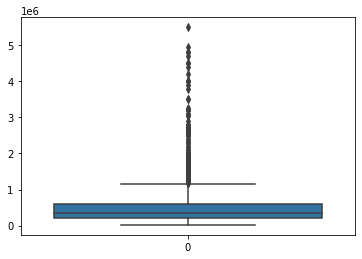

In [66]:
sns.boxplot(df['selling_price'])
plt.show()

In [67]:
df['selling_price'].mean()

484558.48234936094

In [68]:
df[df['selling_price']>1100000]

,year,selling_price,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
12,2018,1650000,25000,1,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
27,2019,1195000,5000,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
29,2014,1964999,28000,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
30,2013,1425000,59000,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
35,2013,1735000,50000,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,2019,1250000,6590,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
4204,2016,1800000,126000,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
4224,2016,2500000,70000,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
4228,2015,1225000,70000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0


In [69]:
df=df[df['selling_price']<1050000]

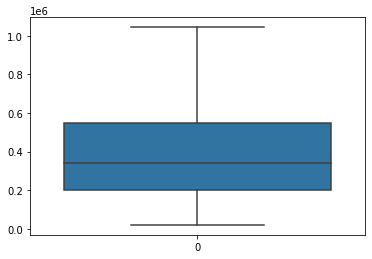

In [70]:
sns.boxplot(df['selling_price'])
plt.show()

In [71]:
df.shape

(3059, 15)

In [72]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

In [73]:
X

,year,km_driven,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,70000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
1,2007,50000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
2,2012,100000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0
3,2017,46000,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
4,2014,141000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,2012,90000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
4335,2014,80000,0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0
4337,2009,83000,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
4338,2016,90000,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0


In [74]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4333    225000
4335    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3059, dtype: int64

In [75]:
X.std().mean()

2573.2052703312825

In [76]:
scaler=StandardScaler()

In [77]:
scaled_X=scaler.fit_transform(X)

In [78]:
scaled_X.std().mean()

1.0

In [79]:
scaled_X

array([[-1.64233062,  0.13496843, -0.50470619, ..., -0.62891112,
        -0.06007432, -0.28446217],
       [-1.64233062, -0.42040242, -0.50470619, ..., -0.62891112,
        -0.06007432, -0.28446217],
       [-0.30803513,  0.96802471, -0.50470619, ..., -0.62891112,
        -0.06007432, -0.28446217],
       ...,
       [-1.10861242,  0.49595948, -0.50470619, ...,  1.5900498 ,
        -0.06007432, -0.28446217],
       [ 0.75940126,  0.69033928, -0.50470619, ..., -0.62891112,
        -0.06007432, -0.28446217],
       [ 0.75940126, -0.69808784, -0.50470619, ..., -0.62891112,
        -0.06007432, -0.28446217]])

In [80]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [81]:
X_train.shape

(2447, 14)

In [82]:
X_test.shape

(612, 14)